# Import libraries

In [1]:
#from matplotlib.pyplot import * 
#from numpy import *
import pynested_fit as pynf
import os

%matplotlib inline
#%matplotlib widget
#%matplotlib notebook

In [2]:
# Define the present path as root path
root_path = os.getcwd()
print(root_path)

path = root_path+'/res_1gauss_bg'

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks


# Visualize some old results without running the code

0 max
nf_output_data_max.dat


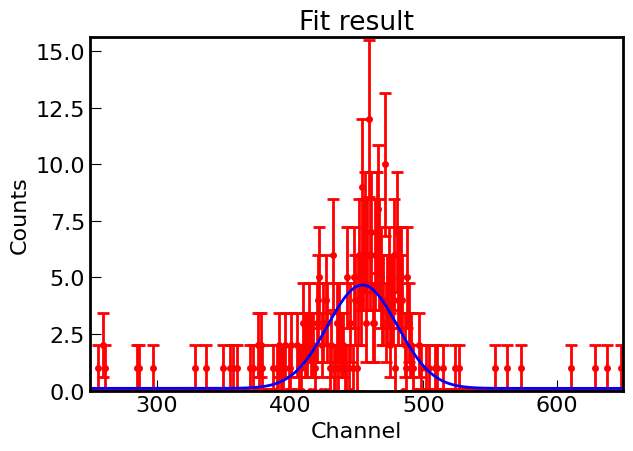

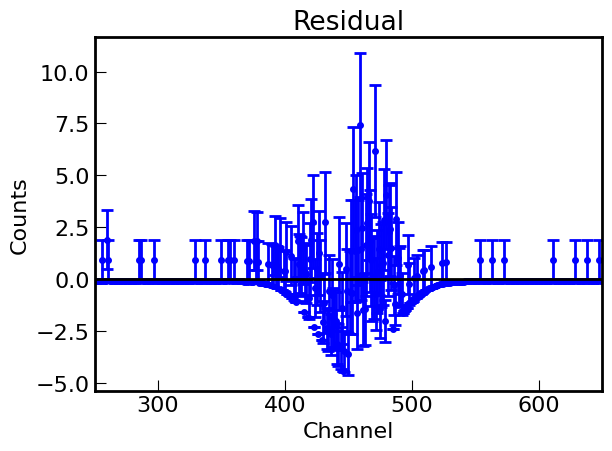

In [3]:
# Visualize results in another directory

# Load the library without loading the adata
an_test = pynf.Analysis(loaddata=False)

# Define a directory and look inside
an_test.plot(path=path)

# Run the code in a specific directory

In [4]:
# Go to a define analysis
os.chdir(path)
print(path)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks/res_1gauss_bg


### Example of legacy function use from USERFCN.f

In [5]:
# Define inputs using a "legacy" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=['GAUSS_BG'],
    params={                    # Function expression from legacy
        'b_g': {'value': 0.01,  'step': -1, 'min': 0, 'max': 0.3 ,   'npar': 1},
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 , 'npar': 2},
        'A_1': {'value': 300,   'step': -1, 'min': 0, 'max': 500 ,   'npar': 3},
        's':   {'value': 20,    'step': -1, 'min': 10, 'max': 30 ,   'npar': 4}
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    search_maxsteps=100000,           # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    # num_tries=1,                    # Number of run of the same analysis for error estimation
    cluster_enable=False,             # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

### Example of latex function

In [6]:
# Define inputs using a "latex" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # Function expression in latex form
        r'gauss_bg(x, A_1, x_1, s, b_g) = A_1 / (s \sqrt{2\pi}) \exp{-(x-x_1)^2/(2s^2)} + b_g'], 
    params={                    # function expression in latex form
        'b_g': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30}
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    search_maxsteps=100000,           # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    cluster_enable=False,             # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

### Example of use of internal or already defined latex function

In [7]:
# Define inputs using a "latex" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # Function expression in latex form
        r'gauss_bg(x, A_1, x_1, s, b_g) = \texttt{GAUSS_IF}(x, x_1, A_1, s) + b_g'], 
    params={                    # function expression in latex form
        'b_g': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30}
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    search_maxsteps=100000,           # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    cluster_enable=False,             # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

In [8]:
# Run the code

# For visualising the progress of the execution use this command
out = conf.sample(output_mode='')
# If nothing shows, use simply the command (symlink to created or version to be used)
# run_nested_fit

# For silently running the code and save the raw output in a dictionnary, use this command
# out = conf.sample(output_mode='none')

========= Parsing result =========
     Latex input: \texttt{GAUSS_IF}(x, x_1, A_1, s) + b_g
Infix expression: GAUSS_IF(x,x1,A1,s)+bg
      Parameters: A_1, b_g, s, x_1
| N. try:  1 | N. step:        100 | Min. loglike:   -1508.351968559572924 | Evidence:   -1514.750501956960079 | Ev. step:   -1515.518525439080349 | Ev. pres. acc.:  1.1785293E+03 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:        200 | Min. loglike:   -1338.534719900345408 | Evidence:   -1345.858845930087000 | Ev. step:   -1346.820893488199772 | Ev. pres. acc.:  1.0095377E+03 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:        300 | Min. loglike:   -1236.035922170250615 | Evidence:   -1242.465960270619235 | Ev. step:   -1243.720896687923641 | Ev. pres. acc.:  9.1022501E+02 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:        400 | Min. loglike:   -1161.761039828952107 | Evidence:   -1168.335186048040669 | Ev. step:   -1169.204479690407197 | Ev. pres. acc.:  8.

# Visualize the results

In [9]:
# Load the nested output data
# The available parameters and other variables that can be plotted are listed
an=pynf.Analysis()

Current path =  .
['A_1', 'x_1', 's', 'b_g']
Index(['weight', 'lnlikelihood', 'A_1', 'x_1', 's', 'b_g'], dtype='object')
Available parameters : ['weight', 'lnlikelihood', 'A_1', 'x_1', 's', 'b_g']


0 max
nf_output_data_max.dat


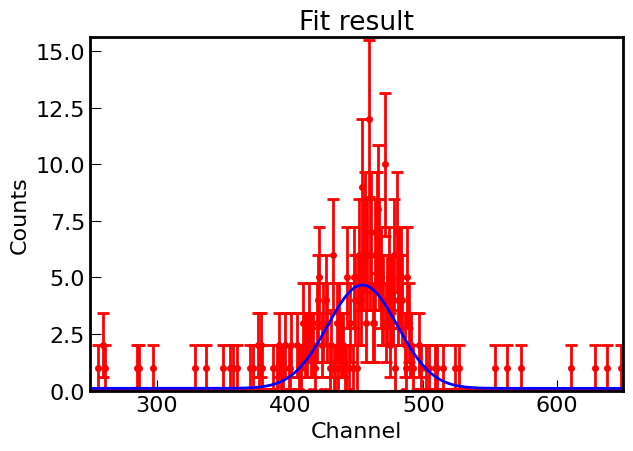

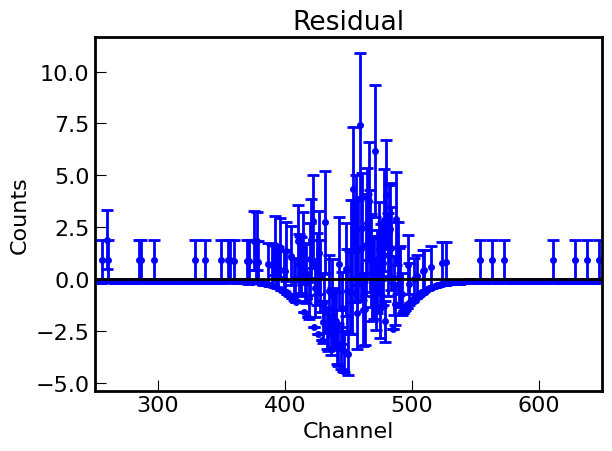

In [10]:
# Plot the data with the best fit (parameters corresponding to the maximum value of the data) and residual
# Other choices are median and mean parameters values selectable with "typeof='mean'" and "typeof='median'"
an.plot()

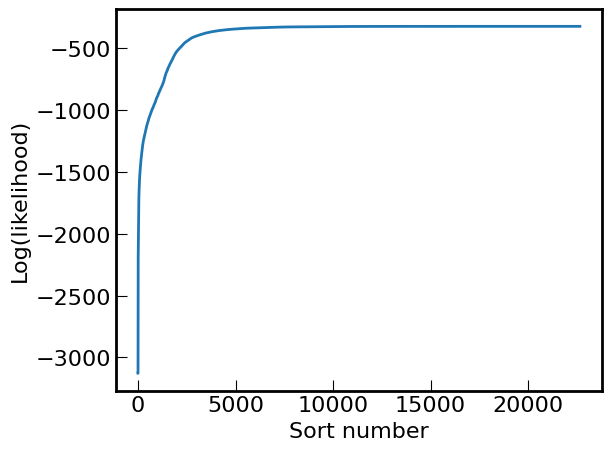

In [11]:
# Plot the likelihood sampling 
an.plot_like()

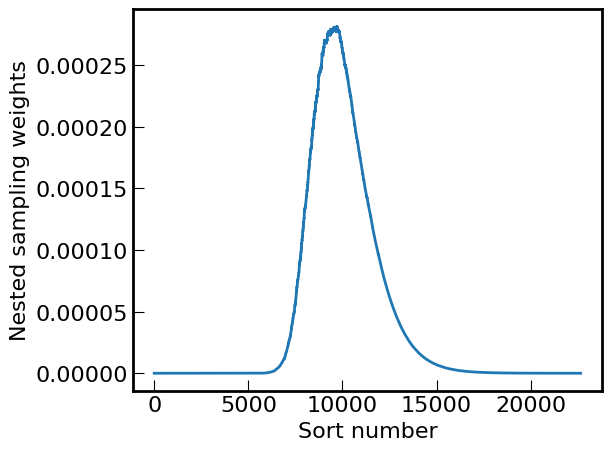

In [12]:
# Plot the weights of nested sampling corresponding to w_n = Delta X_n L_n
an.plot_weights()

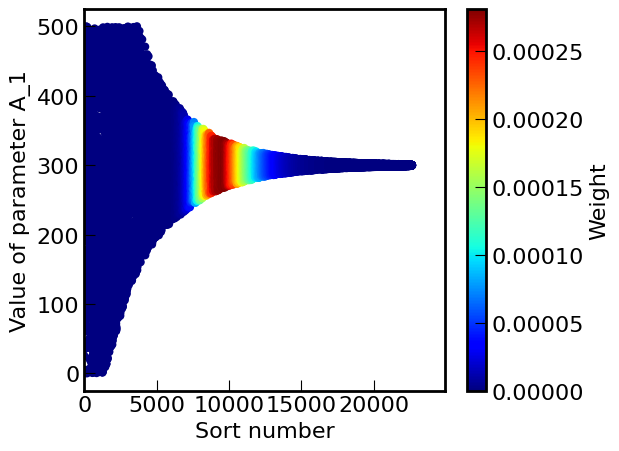

In [13]:
# Plot the parameter convergence
# Colored regions correspond to the high value of the weights
an.plot_par('A_1')

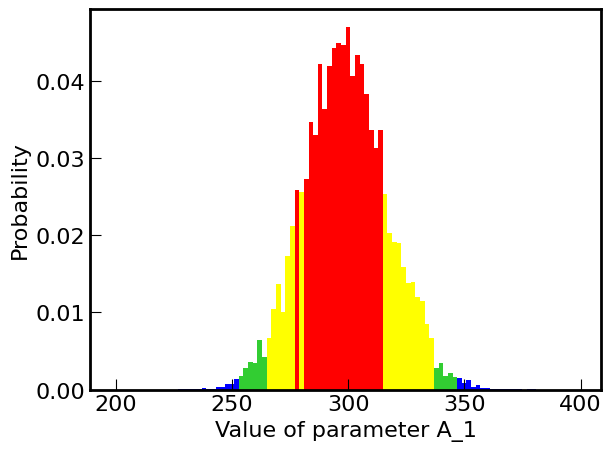

In [14]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo('A_1',bins=100,xmin=200,xmax=400)

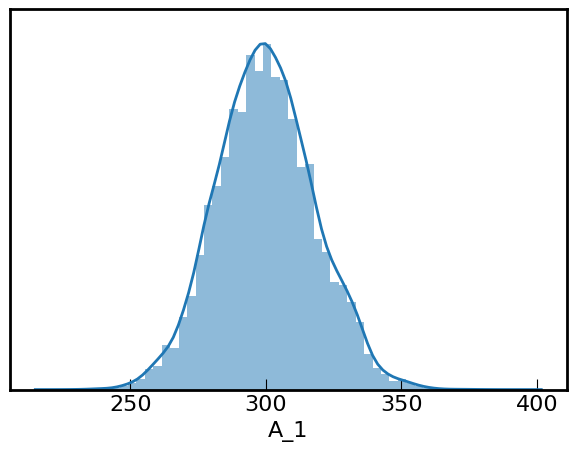

In [15]:
# Plot one parameter interpolated histogram using getdist
# Note: this is a third part function and it requires to specify the path explicitally
an.histo_interp('A_1')

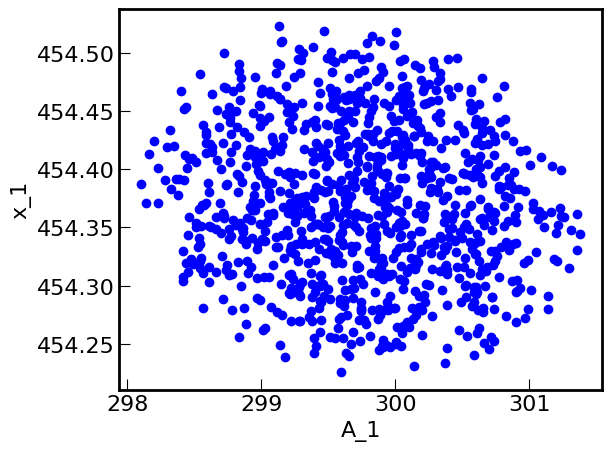

In [16]:
an.plot_live('A_1','x_1')

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1108: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data68[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb68)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1109: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data95[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb95)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1110: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data99[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb99)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1111: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data_rest[::-1,]),interpolation='nearest',extent=extent,aspect='aut

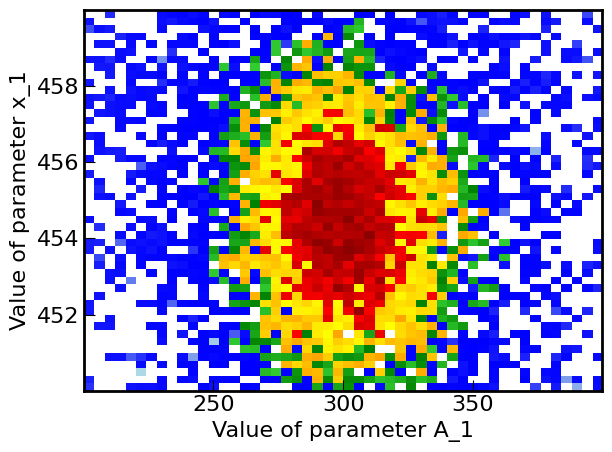

In [17]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo2D('A_1','x_1',bins=50,xmin=200,xmax=400,ymin=450,ymax=460)

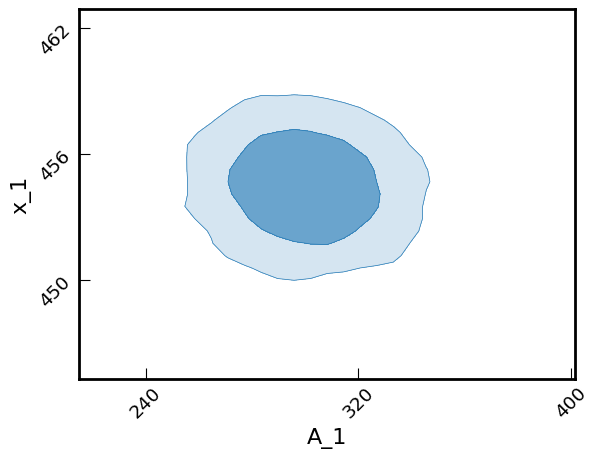

In [18]:
# Same with interpolation from getdist
# Note: this is a third part function and it requires to specify the path explicitally
an.histo2D_interp('A_1','x_1')


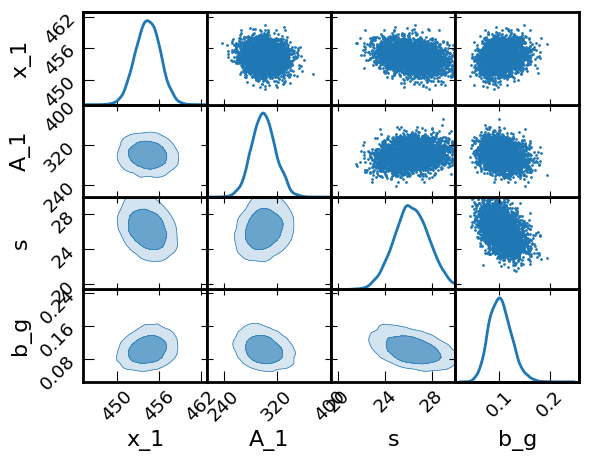

In [19]:
# Triangle plot (from anesthetic) to have a look to all parameters at the same time
an.triangle_plot(['x_1','A_1','s','b_g'])

# Extract important data and post-processing
The results can be extracted by the output of the python function: `out = conf.sample()`
Alternatively, another function can be used to read the output ASCII files (`output = an.read_output()`) or the `.json` finles

### Using the python function output

In [20]:
# Extract the raw information of evidence
out[ 'evidence']

{'stddev': 0.0,
 'uncertainty': 0.09062484232146638,
 'value': -338.37697448688994}

In [21]:
# Specific information of output parameters
par_name = 'x_1'
print(par_name, ' = ', out['params'][par_name][ 'mean'],' ± ', out['params'][par_name][ 'std'])

x_1  =  454.4342944854314  ±  1.7215953785392033


In [22]:
# Miscelaneous information
out['meta']

{'bayes_complexity': 3.869519183700959,
 'information': 8.212862045790644,
 'minimal_req_it': 3688,
 'ncores': 10,
 'timereal': 3.0834950001444668,
 'timetotal': 14.893403000000001}

### Using the built in function 'read_output'

In [23]:
# Read the output files in a dictionnary
out = an.read_output()

# Print some results

# The evidence
print('Evidence = ', out['evidence'],'±',out['evidence_err_est'])

# The Bayesian complexity
print('Complexity = ', out['complexity'])

# Some parameter
par_name = 'x_1'
par_index = out['par_name'].index('x_1')
print(par_name, ' = ', out['mean'][par_index],' ± ', out['sd'][par_index])

Evidence =  -338.37697448688994 ± 0.09062484232146638
Complexity =  3.869519183700959
x_1  =  454.4342944854314  ±  1.7215953785392033


In [24]:
# Statistics (from anesthetic) to have a good estimation of the uncertainties (expecially for the evidence)
an.stats()

logZ 	 = -338.361257 	± 0.096608
D_KL 	 = 8.201105 	± 0.092845
logL_P 	 = -330.160152 	± 0.031170
d_G 	 = 3.677577 	± 0.099121


# Combine latex functions with library functions

## Two Gaussian plus background

In [25]:
# Define a directory 
path = root_path+'/res_2gauss_bg'
# Go to a define analysis
os.chdir(path)

print(path)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks/res_2gauss_bg


### Run the code

In [26]:
# Define inputs using a "latex" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # Function expression in latex form using an internal function (twice)
        r'double_gauss_bg(x, x_1, x_2, A_1, A_2, s, b_g) =' + 
        r' + \texttt{GAUSS_IF}(x, x_1, A_1, s)' +  # These additional "+" are to write in more than one line
        r' + \texttt{GAUSS_IF}(x, x_2, A_2, s) + b_g'], 
    params={                    # function expression in latex form
        'b_g': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'x_2': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_2': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30}
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    search_maxsteps=100000,           # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    # num_tries=4,                    # Number of run of the same analysis for error estimation
    cluster_enable=True,              # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

In [27]:
# Run the code

# For visualising the progress of the execution use this command
out = conf.sample(output_mode='')


# For silently running the code and save the raw output in a dictionnary, use this command
# out = conf.sample(output_mode='none')

========= Parsing result =========
     Latex input: + \texttt{GAUSS_IF}(x, x_1, A_1, s) + \texttt{GAUSS_IF}(x, x_2, A_2, s) + b_g
Infix expression: +GAUSS_IF(x,x1,A1,s)+GAUSS_IF(x,x2,A2,s)+bg
      Parameters: A_1, A_2, b_g, s, x_1, x_2
| N. try:  1 | N. step:        100 | Min. loglike:   -1565.838915709628964 | Evidence:   -1577.848412756982952 | Ev. step:   -1577.955629690186242 | Ev. pres. acc.:  1.2400639E+03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        200 | Min. loglike:   -1395.331465230399090 | Evidence:   -1402.237990148441668 | Ev. step:   -1402.802616067793451 | Ev. pres. acc.:  1.0643535E+03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        300 | Min. loglike:   -1267.555934249950951 | Evidence:   -1275.266176739130287 | Ev. step:   -1275.325646500731864 | Ev. pres. acc.:  9.3728165E+02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        400 | Min. loglike:   -1182.056291576909189 | Evidence:   -1189.9634

### Visualize the results 

In [28]:
# Load the nested output data
# The available parameters and other variables that can be plotted are listed
an=pynf.Analysis()

Current path =  .
['x_1', 'x_2', 'A_1', 'A_2', 's', 'b_g']
Index(['weight', 'lnlikelihood', 'x_1', 'x_2', 'A_1', 'A_2', 's', 'b_g'], dtype='object')
Available parameters : ['weight', 'lnlikelihood', 'x_1', 'x_2', 'A_1', 'A_2', 's', 'b_g']


0 max
nf_output_data_max.dat


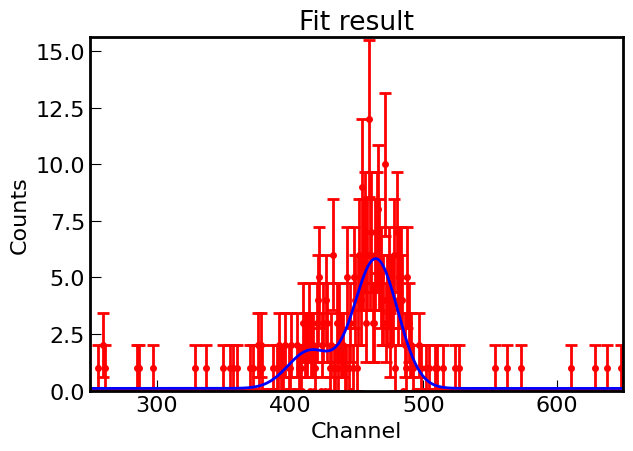

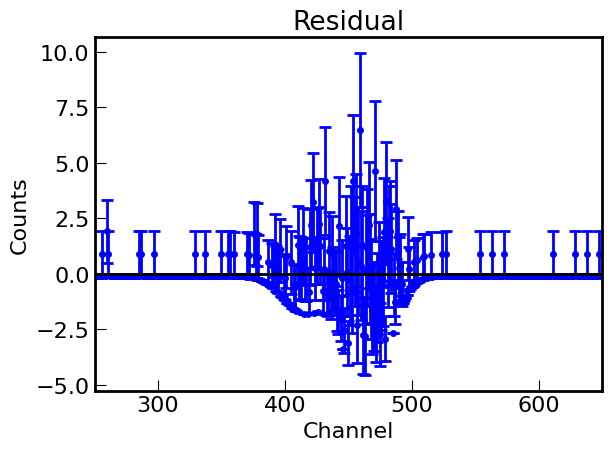

In [29]:
# Plot the data with the best fit (parameters corresponding to the maximum value of the data) and residual
# Other choices are median and mean parameters values selectable with "typeof='mean'" and "typeof='median'"
an.plot()

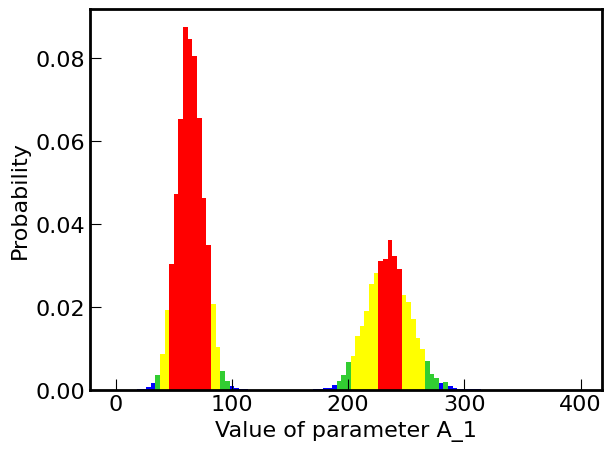

In [30]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo('A_1',bins=100,xmin=0,xmax=400)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1108: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data68[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb68)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1109: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data95[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb95)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1110: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data99[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb99)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1111: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data_rest[::-1,]),interpolation='nearest',extent=extent,aspect='aut

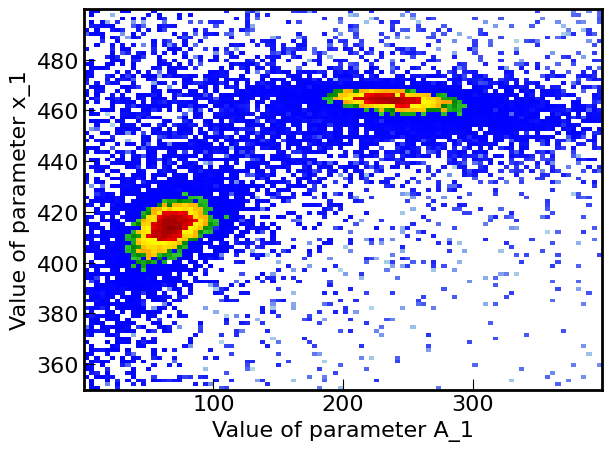

In [31]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo2D('A_1','x_1',bins=100,xmin=0,xmax=400,ymin=350,ymax=500)

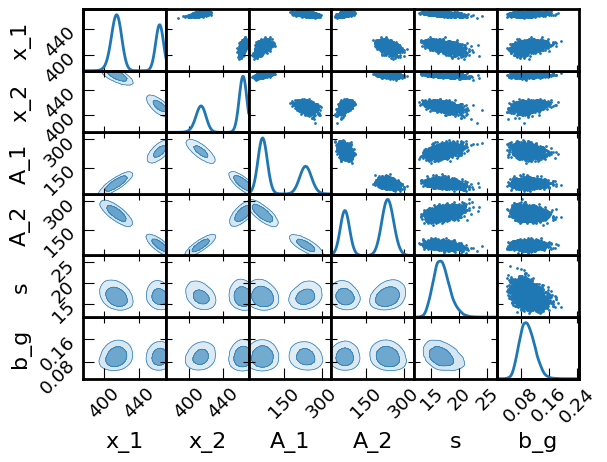

In [32]:
# Triangle plot (from anesthetic) to have a look to all parameters at the same time
an.triangle_plot(['x_1', 'x_2', 'A_1', 'A_2','s','b_g'])

In [33]:
# Statistics (from anesthetic) to have a good estimation of the uncertainties (expecially for the evidence)
an.stats()

logZ 	 = -324.662714 	± 0.106679
D_KL 	 = 13.644454 	± 0.102963
logL_P 	 = -311.018261 	± 0.043246
d_G 	 = 6.739418 	± 0.159136


## Three Gaussian plus background

In [55]:
# Define a directory 
path = root_path+'/res_3gauss_bg'
# Go to a define analysis
os.chdir(path)

print(path)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks/res_3gauss_bg


### Run the code

In [35]:
# Define inputs using a "latex" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # Function expression in latex form using an internal function (twice)
        r'triple_gauss_bg(x, x_1, x_2, x_3, A_1, A_2, A_3, s, b_g) =' + 
        r' + \texttt{GAUSS_IF}(x, x_1, A_1, s)' +  # These additional "+" are to write in more than one line
        r' + \texttt{GAUSS_IF}(x, x_2, A_2, s)' + 
        r' + \texttt{GAUSS_IF}(x, x_3, A_3, s) + b_g'], 
    params={                    # function expression in latex form
        'b_g': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'x_2': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'x_3': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_2': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_3': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30}
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    search_maxsteps=100000,           # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    # num_tries=4,                    # Number of run of the same analysis for error estimation
    cluster_enable=True,             # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

In [36]:
# Run the code

# For visualising the progress of the execution use this command
out = conf.sample(output_mode='')


# For silently running the code and save the raw output in a dictionnary, use this command
# out = conf.sample(output_mode='none')

========= Parsing result =========
     Latex input: + \texttt{GAUSS_IF}(x, x_1, A_1, s) + \texttt{GAUSS_IF}(x, x_2, A_2, s) + \texttt{GAUSS_IF}(x, x_3, A_3, s) + b_g
Infix expression: +GAUSS_IF(x,x1,A1,s)+GAUSS_IF(x,x2,A2,s)+GAUSS_IF(x,x3,A3,s)+bg
      Parameters: A_1, A_2, A_3, b_g, s, x_1, x_2, x_3
| N. try:  1 | N. step:        100 | Min. loglike:   -1694.038931823371058 | Evidence:   -1701.036437365695065 | Ev. step:   -1701.118367833459843 | Ev. pres. acc.:  1.3519982E+03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        200 | Min. loglike:   -1510.959162824916575 | Evidence:   -1520.396635266042267 | Ev. step:   -1520.644776438481358 | Ev. pres. acc.:  1.1712584E+03 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:        300 | Min. loglike:   -1337.941663991841097 | Evidence:   -1344.990863176042012 | Ev. step:   -1345.423371340960784 | Ev. pres. acc.:  9.9575266E+02 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:        40

### Visualize the results 

In [37]:
# Load the nested output data
# The available parameters and other variables that can be plotted are listed
an=pynf.Analysis()

Current path =  .
['x_1', 'x_2', 'x_3', 'A_1', 'A_2', 'A_3', 's', 'b_g']


Index(['weight', 'lnlikelihood', 'x_1', 'x_2', 'x_3', 'A_1', 'A_2', 'A_3', 's',
       'b_g'],
      dtype='object')
Available parameters : ['weight', 'lnlikelihood', 'x_1', 'x_2', 'x_3', 'A_1', 'A_2', 'A_3', 's', 'b_g']


0 max
nf_output_data_max.dat


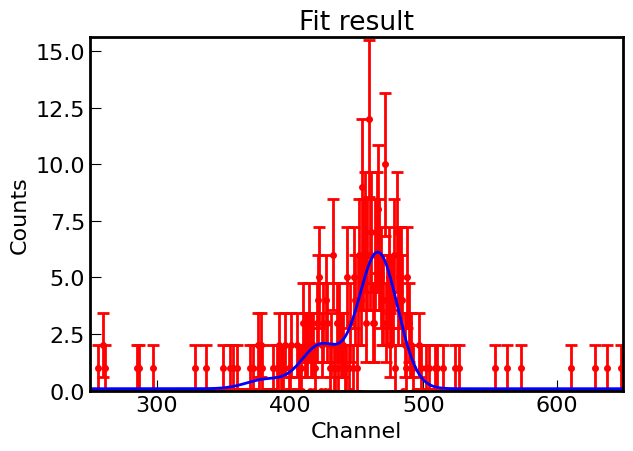

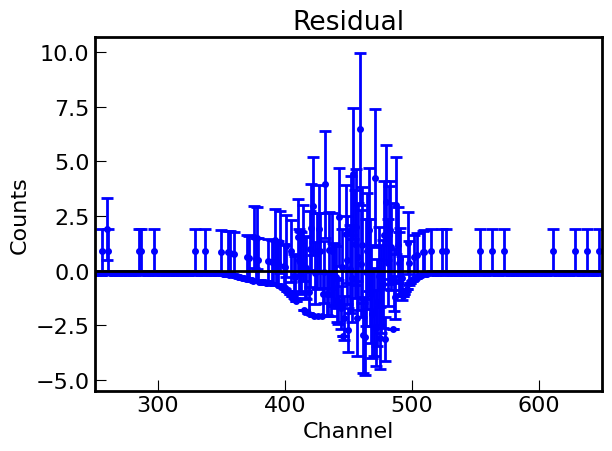

In [38]:
# Plot the data with the best fit (parameters corresponding to the maximum value of the data) and residual
# Other choices are median and mean parameters values selectable with "typeof='mean'" and "typeof='median'"
an.plot()

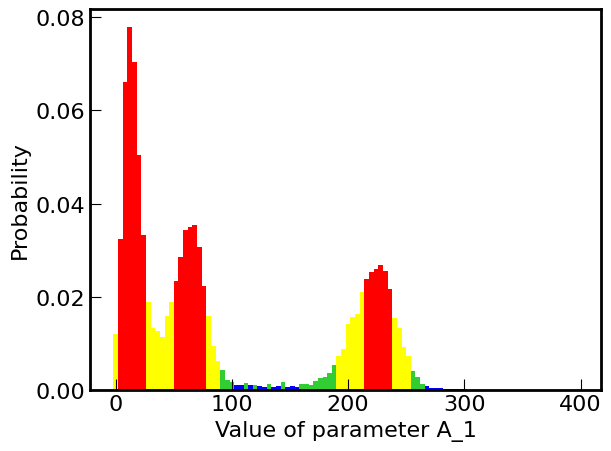

In [39]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo('A_1',bins=100,xmin=0,xmax=400)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1108: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data68[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb68)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1109: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data95[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb95)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1110: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data99[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb99)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1111: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data_rest[::-1,]),interpolation='nearest',extent=extent,aspect='aut

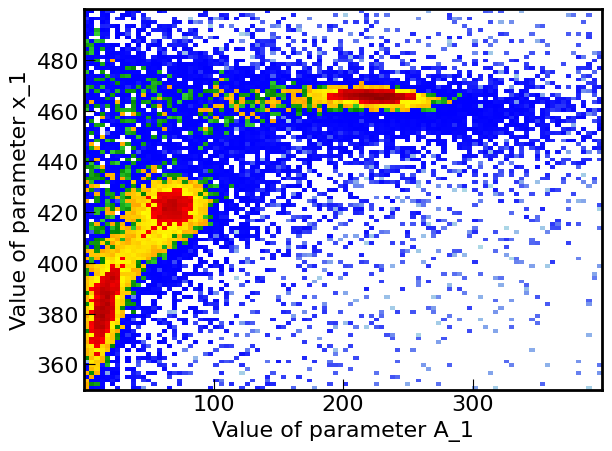

In [40]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo2D('A_1','x_1',bins=100,xmin=0,xmax=400,ymin=350,ymax=500)

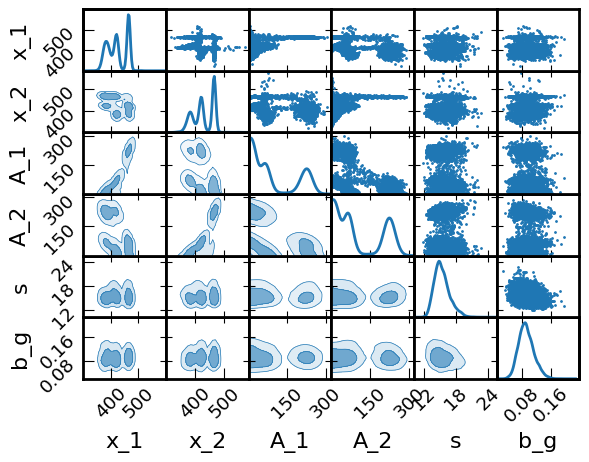

In [41]:
# Triangle plot (from anesthetic) to have a look to all parameters at the same time
an.triangle_plot(['x_1', 'x_2', 'A_1', 'A_2','s','b_g'])

In [42]:
# Statistics (from anesthetic) to have a good estimation of the uncertainties (expecially for the evidence)
an.stats()

logZ 	 = -324.799439 	± 0.117655
D_KL 	 = 16.867233 	± 0.109622
logL_P 	 = -307.932206 	± 0.067805
d_G 	 = 12.694261 	± 0.279741


Taking the last available file
Showing file  nf_output_cluster_final_20240929_171315.dat
Number of clusters: 11


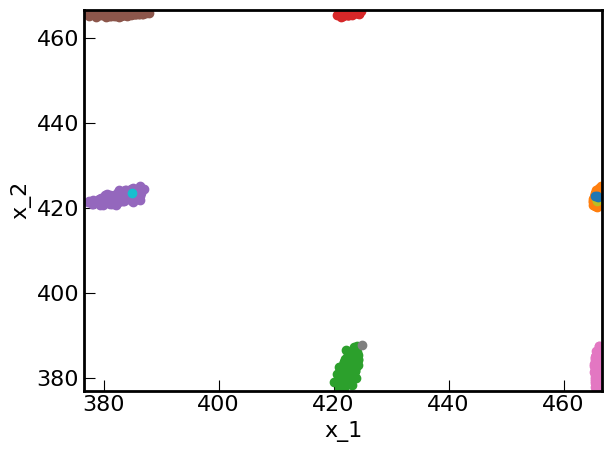

In [56]:
# If a cluster analysis have been done, visualize the clusters
## in 2D
an.plot_clusters('x_1','x_2')

Taking the last available file
Showing file  nf_output_cluster_final_20240929_171315.dat
Number of clusters: 11


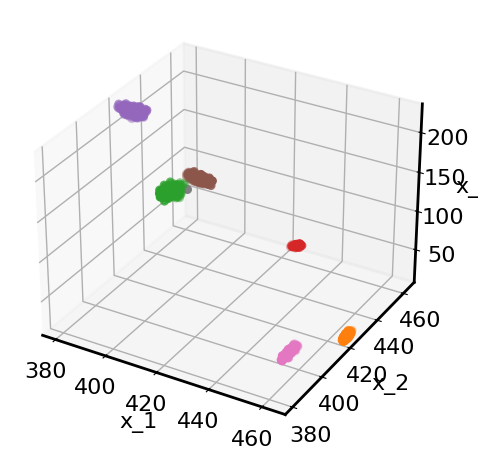

In [57]:
## and in 3D
an.plot_clusters3D('x_1','x_2','x_3')

## Four Gaussian plus background

In [45]:
# Define a directory 
path = root_path+'/res_4gauss_bg'
# Go to a define analysis
os.chdir(path)

print(path)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks/res_4gauss_bg


### Run the code

In [46]:
# Define inputs using a "latex" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # Function expression in latex form using an internal function (twice)
        r'four_gauss_bg(x, x_1, x_2, x_3, x_4, A_1, A_2, A_3, A_4, s, b_g) =' + 
        r' + \texttt{GAUSS_IF}(x, x_1, A_1, s)' +  # These additional "+" are to write in more than one line
        r' + \texttt{GAUSS_IF}(x, x_2, A_2, s)' + 
        r' + \texttt{GAUSS_IF}(x, x_3, A_3, s)' + 
        r' + \texttt{GAUSS_IF}(x, x_4, A_4, s) + b_g'], 
    params={                    # function expression in latex form
        'b_g': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'x_2': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'x_3': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'x_4': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_2': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_3': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_4': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30}
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    search_maxsteps=100000,           # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    # num_tries=4,                    # Number of run of the same analysis for error estimation
    cluster_enable=True,              # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

In [47]:
# Run the code

# For visualising the progress of the execution use this command
out = conf.sample(output_mode='')


# For silently running the code and save the raw output in a dictionnary, use this command
# out = conf.sample(output_mode='none')

========= Parsing result =========
     Latex input: + \texttt{GAUSS_IF}(x, x_1, A_1, s) + \texttt{GAUSS_IF}(x, x_2, A_2, s) + \texttt{GAUSS_IF}(x, x_3, A_3, s) + \texttt{GAUSS_IF}(x, x_4, A_4, s) + b_g
Infix expression: +GAUSS_IF(x,x1,A1,s)+GAUSS_IF(x,x2,A2,s)+GAUSS_IF(x,x3,A3,s)+GAUSS_IF(x,x4,A4,s)+bg
      Parameters: A_1, A_2, A_3, A_4, b_g, s, x_1, x_2, x_3, x_4
| N. try:  1 | N. step:        100 | Min. loglike:   -1783.696520862828038 | Evidence:   -1799.125873075741083 | Ev. step:   -1799.267591040443449 | Ev. pres. acc.:  1.4173625E+03 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:        200 | Min. loglike:   -1575.434722097686972 | Evidence:   -1585.840103634527168 | Ev. step:   -1586.435047509919741 | Ev. pres. acc.:  1.2039767E+03 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:        300 | Min. loglike:   -1428.058829173270396 | Evidence:   -1434.643204301716423 | Ev. step:   -1435.780316444020173 | Ev. pres. acc.:  1.0526798E+03 | Typica

### Visualize the results 

In [48]:
# Load the nested output data
# The available parameters and other variables that can be plotted are listed
an=pynf.Analysis()

Current path =  .
['x_1', 'x_2', 'x_3', 'x_4', 'A_1', 'A_2', 'A_3', 'A_4', 's', 'b_g']
Index(['weight', 'lnlikelihood', 'x_1', 'x_2', 'x_3', 'x_4', 'A_1', 'A_2',
       'A_3', 'A_4', 's', 'b_g'],
      dtype='object')
Available parameters : ['weight', 'lnlikelihood', 'x_1', 'x_2', 'x_3', 'x_4', 'A_1', 'A_2', 'A_3', 'A_4', 's', 'b_g']


0 max
nf_output_data_max.dat


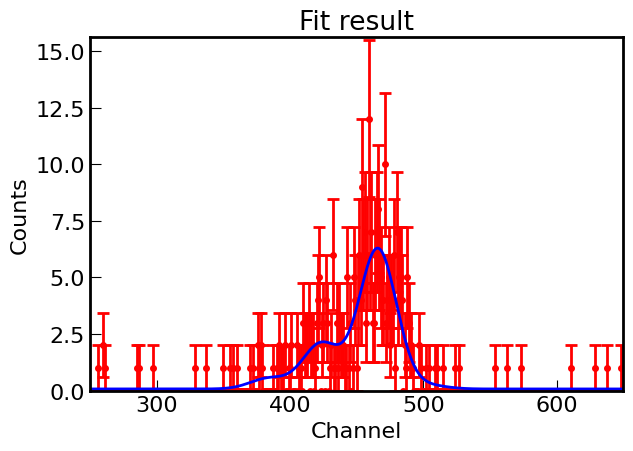

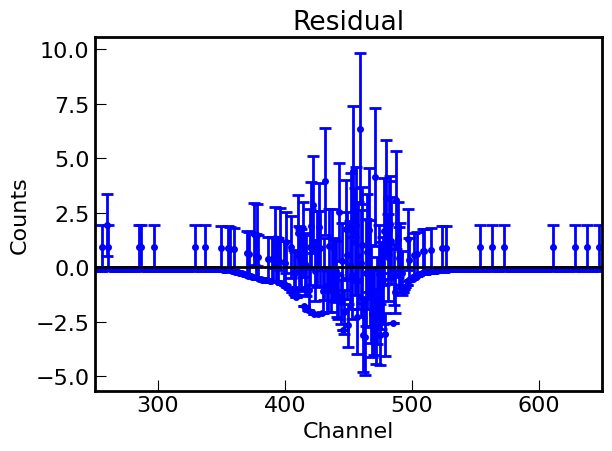

In [49]:
# Plot the data with the best fit (parameters corresponding to the maximum value of the data) and residual
# Other choices are median and mean parameters values selectable with "typeof='mean'" and "typeof='median'"
an.plot()

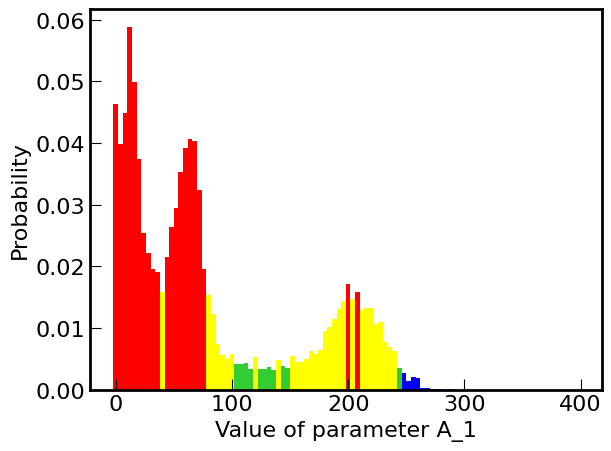

In [50]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo('A_1',bins=100,xmin=0,xmax=400)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1108: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data68[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb68)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1109: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data95[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb95)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1110: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data99[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb99)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1111: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data_rest[::-1,]),interpolation='nearest',extent=extent,aspect='aut

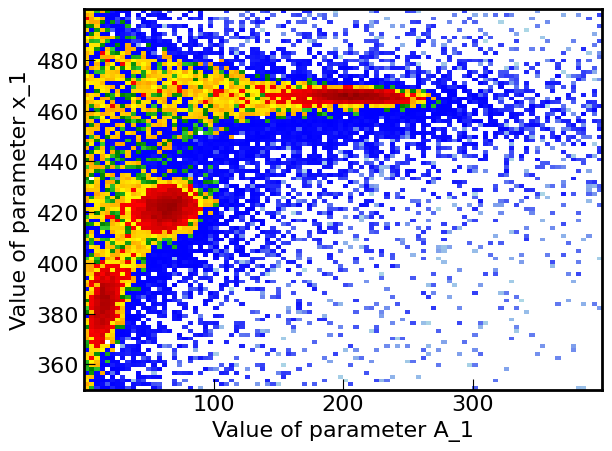

In [58]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo2D('A_1','x_1',bins=100,xmin=0,xmax=400,ymin=350,ymax=500)

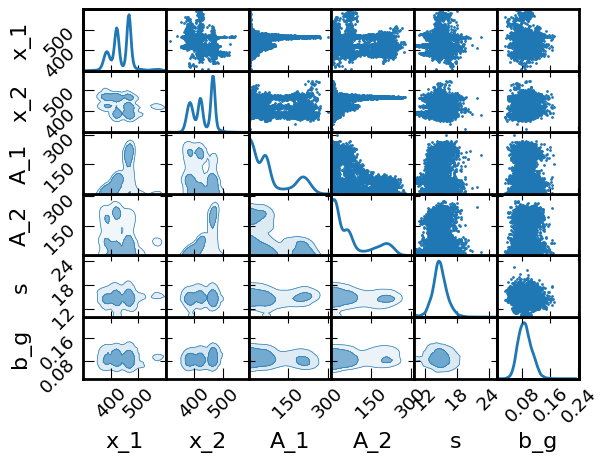

In [52]:
# Triangle plot (from anesthetic) to have a look to all parameters at the same time
an.triangle_plot(['x_1', 'x_2', 'A_1', 'A_2','s','b_g'])

In [53]:
# Statistics (from anesthetic) to have a good estimation of the uncertainties (expecially for the evidence)
an.stats()

logZ 	 = -326.597192 	± 0.138404
D_KL 	 = 18.991625 	± 0.131651
logL_P 	 = -307.605568 	± 0.061465
d_G 	 = 11.068896 	± 0.274867
